Reference: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.ticker as ticker

In [ ]:
path = "/content/drive/My Drive/Python/OilProduction/37145_Prod_noNAN.csv"
df = pd.read_csv(path, 
                #  na_values=[' ',0],
                 usecols=['OilProduced'])
df.head(70)

,OilProduced
0,8339
1,9566
2,6654
3,4951
4,3849
...,...
65,220
66,220
67,215
68,215


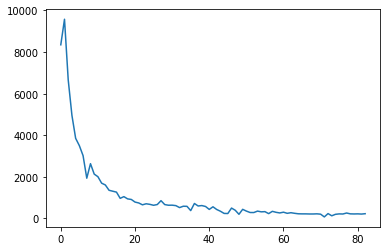

In [ ]:
dataset=df.values
plt.plot(dataset)

In [ ]:
# LSTM for international airline passengers problem with window regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv(path, usecols=['OilProduced'])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

Epoch 1/100
54/54 - 0s - loss: 0.0110
Epoch 2/100
54/54 - 0s - loss: 0.0067
Epoch 3/100
54/54 - 0s - loss: 0.0053
Epoch 4/100
54/54 - 0s - loss: 0.0043
Epoch 5/100
54/54 - 0s - loss: 0.0036
Epoch 6/100
54/54 - 0s - loss: 0.0028
Epoch 7/100
54/54 - 0s - loss: 0.0022
Epoch 8/100
54/54 - 0s - loss: 0.0018
Epoch 9/100
54/54 - 0s - loss: 0.0013
Epoch 10/100
54/54 - 0s - loss: 9.9771e-04
Epoch 11/100
54/54 - 0s - loss: 8.1967e-04
Epoch 12/100
54/54 - 0s - loss: 6.6416e-04
Epoch 13/100
54/54 - 0s - loss: 5.7320e-04
Epoch 14/100
54/54 - 0s - loss: 5.2525e-04
Epoch 15/100
54/54 - 0s - loss: 4.9578e-04
Epoch 16/100
54/54 - 0s - loss: 4.8924e-04
Epoch 17/100
54/54 - 0s - loss: 4.8504e-04
Epoch 18/100
54/54 - 0s - loss: 4.7086e-04
Epoch 19/100
54/54 - 0s - loss: 4.8853e-04
Epoch 20/100
54/54 - 0s - loss: 5.1168e-04
Epoch 21/100
54/54 - 0s - loss: 4.4251e-04
Epoch 22/100
54/54 - 0s - loss: 4.5303e-04
Epoch 23/100
54/54 - 0s - loss: 4.4550e-04
Epoch 24/100
54/54 - 0s - loss: 4.3419e-04
Epoch 25/100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


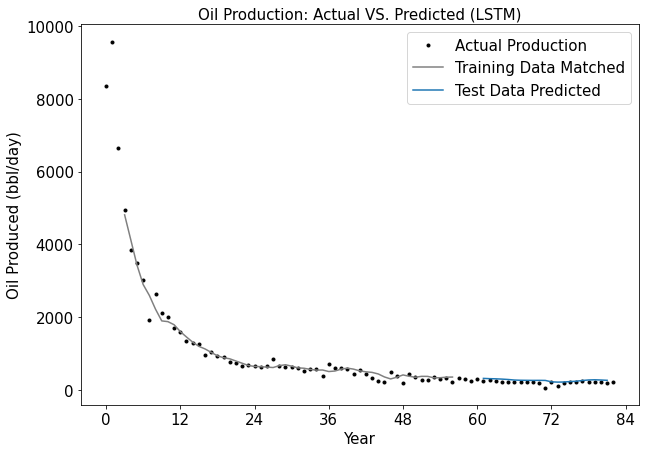

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(10,7))

plt.plot(scaler.inverse_transform(dataset),'.',color='black')
plt.plot(trainPredictPlot,"-", color='gray')
plt.plot(testPredictPlot)

plt.title('comparison')
plt.ylabel('Oil Produced (bbl/day)',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.legend(['Actual Production', 'Training Data Matched','Test Data Predicted'], loc='upper right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted (LSTM)',fontsize=15)


ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
# ax.set_ylim(0,1000)
# ax.set_xlim(48,84)


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (testScore))

train_Rsquare = r2_score(trainY[0], trainPredict[:,0])
print('Train R_square: %.2f R_square' % (train_Rsquare))
test_Rsquare = r2_score(testY[0], testPredict[:,0])
print('Test R_square: %.2f R_square' % (test_Rsquare))

train_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
test_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('Train MAE: %.2f ' % (train_mae))
print('Test MAE: %.2f ' % (test_mae))


Train RMSE: 151.77 RMSE
Test RMSE: 70.46 RMSE
Train R_square: 0.98 R_square
Test R_square: -1.87 R_square
Train MAE: 100.29 
Test MAE: 59.26 


In [ ]:
#  1-year prediction results
testScore1 = math.sqrt(mean_squared_error(testY[0][:12], testPredict[:12,0]))
print('1-year Test RMSE: %.2f RMSE' % (testScore1))

test_Rsquare1 = r2_score(testY[0][:12], testPredict[:12,0])
print('1-year Test R_square: %.2f R_square' % (test_Rsquare1))

test_mae1 = mean_absolute_error(testY[0][:12], testPredict[:12,0])
print('1-year Test MAE: %.2f ' % (test_mae1))



1-year Test RMSE: 80.55 RMSE
1-year Test R_square: -1.97 R_square
1-year Test MAE: 68.36 


In [ ]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
# mask = ~np.isnan(testY_unscaled[0]) & ~np.isnan(testPredict_unscaled[:,0])  
#https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy

trainScore = math.sqrt(mean_squared_error(trainY_unscaled[0], trainPredict_unscaled[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_unscaled[0], testPredict_unscaled[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

train_Rsquare = r2_score(trainY_unscaled[0], trainPredict_unscaled[:,0])
# train_Rsquare = sm.OLS((trainY_unscaled[0], trainPredict_unscaled[:,0]), missing='drop').fit().rsquared
print('train_Rsquare: %.2f' % (train_Rsquare))
# test_Rsquare = r2_score(testY_unscaled[0][mask], testPredict_unscaled[:,0][mask])
test_Rsquare = r2_score(testY_unscaled[0], testPredict_unscaled[:,0])
# test_Rsquare = r2_score(testY[0], testPredict[:,0])
print('Test_Rsquare: %.2f' % (test_Rsquare))

Train Score: 442.71 RMSE
Test Score: 53.88 RMSE
train_Rsquare: 0.93
Test_Rsquare: -0.46


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


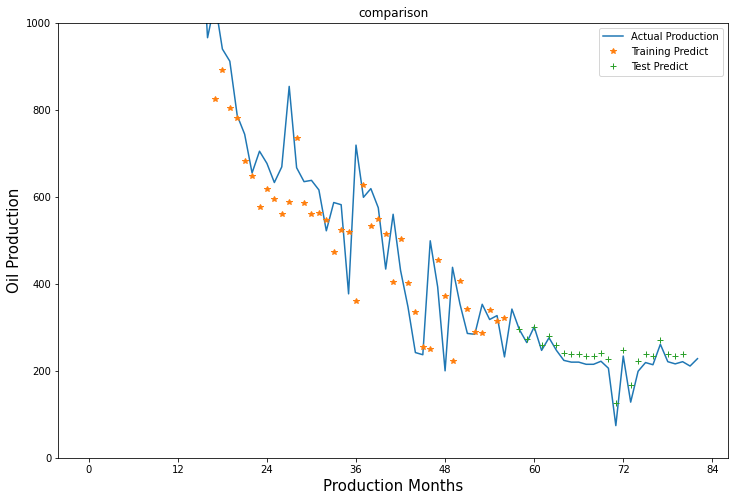

In [ ]:
# 蓝色为原数据，绿色为训练集的预测值，红色为测试集的预测值
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)  #依据给定数组(a)的形状和类型返回一个新的空数组
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict_unscaled)+look_back, :] = trainPredict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict_unscaled)+(look_back*2)+1:len(dataset)-1, :] = testPredict_unscaled
testPredictPlot[len(trainPredict_unscaled)+(look_back*2)+1-1:len(dataset)-1-1, :] = testPredict_unscaled

# plot baseline and predictions
plt.figure(figsize=(12,8))

plt.plot(dataset)
plt.plot(trainPredictPlot,"*")
plt.plot(testPredictPlot,"+")
# plt.plot(trainPredict_unscaled,"*")
# plt.plot(testPredict_unscaled,"+")

plt.title('comparison')
plt.ylabel('Oil Production',fontsize=15)
plt.xlabel('Production Months',fontsize=15)
plt.legend(['Actual Production', 'Training Predict','Test Predict'], loc='upper right')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax.set_ylim(0,1000)

plt.show()

In [ ]:
testPredictPlot

array([[-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [